### **1. Problem Understanding**

---

#### **Objective**  
The goal of the project is to predict house prices based on a dataset containing various features related to properties (e.g., size, location, quality). This involves building a regression model that can accurately estimate the sale price (`SalePrice`) for each house.

---

#### **Output**  
The target variable is **continuous numerical values** representing the sale prices of houses. Models will aim to predict these values as closely as possible to the actual prices.

---

#### **Evaluation Metric**  
The performance metric is likely **Root Mean Squared Error (RMSE)** applied to the **log-transformed `SalePrice`**.  

- **Why log transformation?**  
   - House prices often exhibit skewed distributions, with a few extremely high-priced houses. Applying a log transformation reduces skewness and helps the model focus on relative differences rather than absolute values.
   - RMSE on the log scale penalizes large deviations in terms of percentage error rather than raw error.

- **RMSE Formula on Log Scale:**  

   \[
   RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n \left( \log(\text{predicted}_i + 1) - \log(\text{actual}_i + 1) \right)^2}
   \]

---

#### **Key Considerations**  
- **Data Structure:** You are likely working with tabular data, including numerical, ordinal, and categorical features.
- **Feature Scope:** Features may include:
  - **Numerical:** `LotArea`, `GrLivArea`, `TotalBsmtSF`.
  - **Categorical:** `Neighborhood`, `GarageType`, `HouseStyle`.
  - **Ordinal:** `OverallQual`, `ExterQual`.
- **Domain Knowledge:** Leverage real estate knowledge where possible (e.g., location and quality are typically strong price determinants).

### **2. Data Exploration**

In [24]:
import pandas as pd

# Load datasets
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

# Basic structure of the datasets
print("Train Dataset Info:")
print(train.info())
print("\nTest Dataset Info:")
print(test.info())

# Check for missing values
print("\nMissing values in Train Dataset:")
print(train.isnull().sum()[train.isnull().sum() > 0])

print("\nMissing values in Test Dataset:")
print(test.isnull().sum()[test.isnull().sum() > 0])


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

### Identify Target Variable and Features
##### Target Variable:

The target is `SalePrice` in the training set. It’s a continuous variable. 
Checking its distribution.
Features:

1. Numerical (e.g., `LotArea`, `GrLivArea`, `YearBuilt`).
2. Categorical (e.g., `Neighborhood`, `GarageType`).
3. Ordinal (e.g., `OverallQual`, `ExterQual`).
4. Action: Separate features and target variable.

In [25]:
target = train['SalePrice']
features = train.drop(columns=['SalePrice'])

#### Explore SalePrice Distribution
Check Distribution:

Plot the histogram of `SalePrice` to visualize its distribution.
> * Checking for Skewness:

In [26]:
print(f"Skewness of SalePrice: {train['SalePrice'].skew()}")

Skewness of SalePrice: 1.8828757597682129


### Applying Log Transformation if Necessary:

> If skewness > 0.75, apply a log transformation

In [27]:
import numpy as np
train['LogSalePrice'] = np.log1p(train['SalePrice'])  # log(1 + SalePrice)

> Comparing the original and log-transformed distributions using histograms.

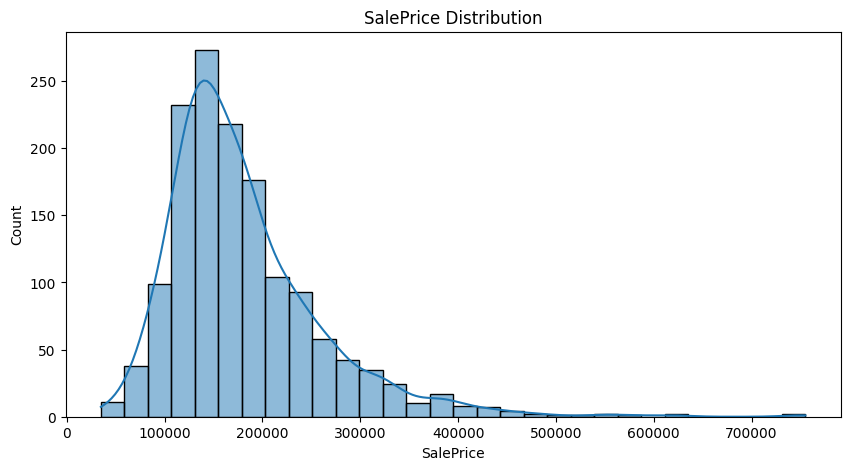

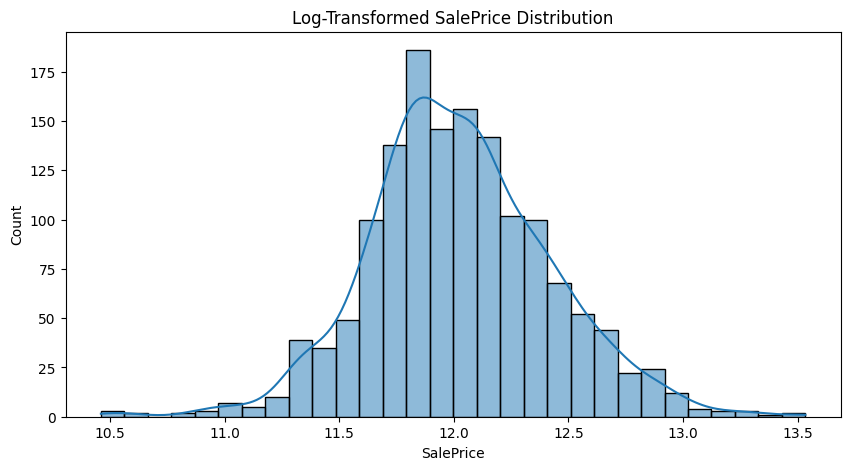

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original SalePrice distribution
plt.figure(figsize=(10, 5))
sns.histplot(train['SalePrice'], kde=True, bins=30)
plt.title('SalePrice Distribution')

# Log-transformed SalePrice distribution
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(train['SalePrice']), kde=True, bins=30)
plt.title('Log-Transformed SalePrice Distribution')
plt.show()


### **3. Data Cleaning**
I'll focus on handling missing values, removing outliers, and addressing inconsistencies. 

In [29]:
# Combine data for easier processing (optional, useful for categorical alignment)
all_data = pd.concat([train.drop('SalePrice', axis=1), test], axis=0)

#### * Handle Missing Values
Check Missing Values:

In [30]:
print("Missing Values in Train Dataset:")
print(train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending=False))

print("\nMissing Values in Test Dataset:")
print(test.isnull().sum()[test.isnull().sum() > 0].sort_values(ascending=False))


Missing Values in Train Dataset:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Missing Values in Test Dataset:
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea        

In [31]:
train['GarageType'].fillna('None', inplace=True)
test['GarageType'].fillna('None', inplace=True)
